In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
%matplotlib inline

In [2]:
my_data_dir = 'C:\\Users\\Marcin\\Desktop\\Python\\Studia\\RoadClassification\\baza_7\\RT_VP'

In [3]:
os.listdir(my_data_dir)

['x_test.npy', 'x_train.npy', 'y_test.npy', 'y_train.npy']

In [4]:
X_train = np.load(os.path.join(my_data_dir, "x_train.npy"))
X_test = np.load(os.path.join(my_data_dir, "x_test.npy"))

y_train = np.load(os.path.join(my_data_dir, "y_train.npy"))
y_test = np.load(os.path.join(my_data_dir, "y_test.npy"))

In [5]:
X_train.shape

(512, 128, 128, 3)

In [6]:
y_train.shape

(512, 5)

In [7]:
y_train
# class 1 - Divide Roads (merge)
# class 2 - Express Roads (merge)
# class 3 - PAved Street Roads
# class 4 - unpaved street Roads
# class 5 - Parquet street roads


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [ ]:
#delete last class in X
#X_train_new = np.delete(X_train, np.argwhere(y_train[:,4]), axis=0)
#X_test_new = np.delete(X_test, np.argwhere(y_test[:,4]), axis=0)

In [ ]:
#delete last class in y
#y_train_temp = np.delete(y_train, np.argwhere(y_train[:,4]), axis=0)
#y_train_new = np.delete(y_train_temp, 4, axis=1) 

#y_test_temp = np.delete(y_test, np.argwhere(y_test[:,4]), axis=0)
#y_test_new = np.delete(y_test_temp, 4, axis=1) 
#Was delete previously lol

In [6]:
#merge class 1 and class 2 because they are both asfalt roads
#y_train[:,0] = np.logical_or(y_train[:,0],y_train[:,1]).astype(int)
#y_train_new = np.delete(y_train, 1, axis=1)

#y_test[:,0] = np.logical_or(y_test[:,0],y_test[:,1]).astype(int)
#y_test_new = np.delete(y_test, 1, axis=1)
#siec klasyfikuje tylko te klase xd

In [ ]:
#class 1 - asfalt roads
#class 2 - paved 
#class 3 - unpaved
#class 4 - parquet street roads


C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


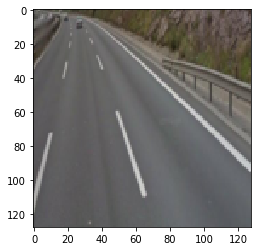

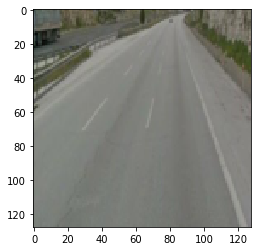

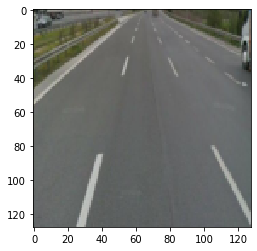

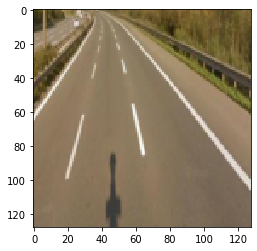

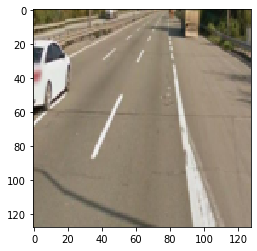

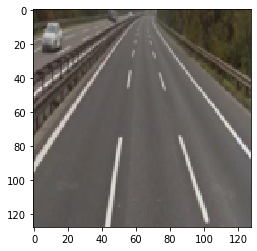

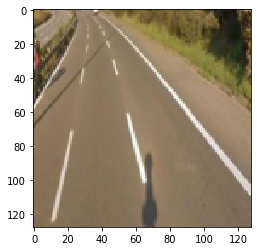

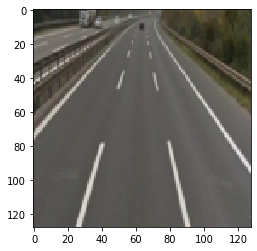

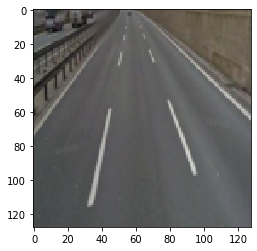

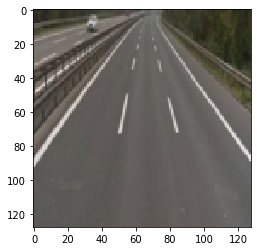

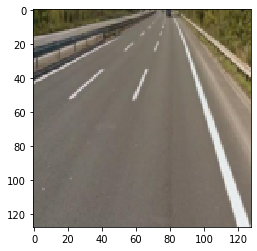

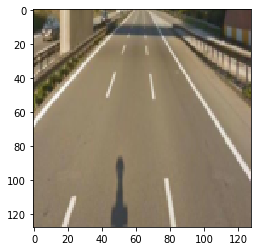

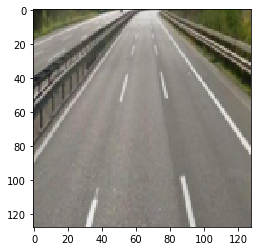

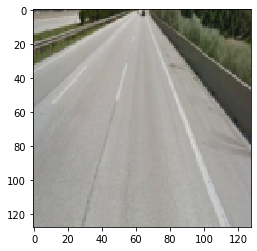

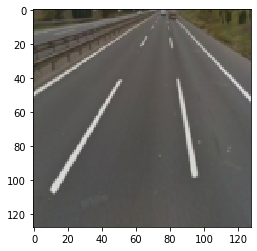

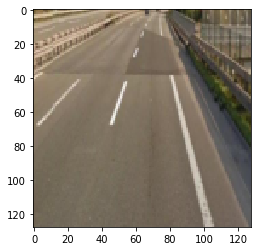

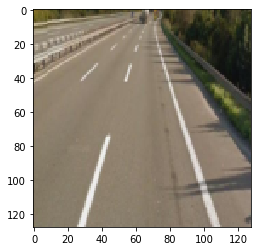

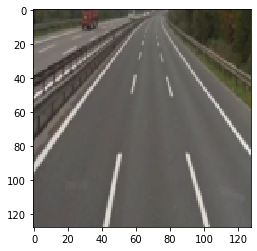

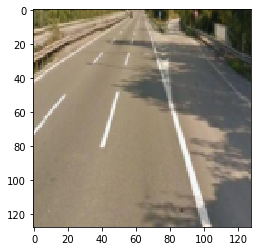

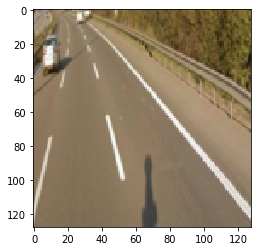

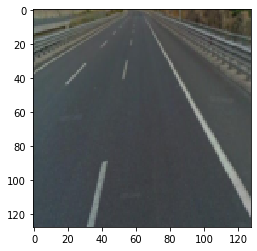

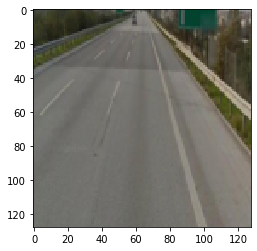

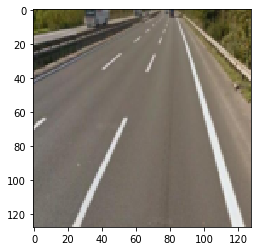

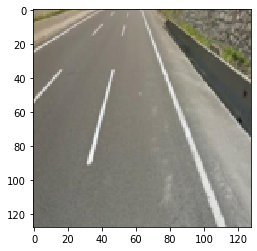

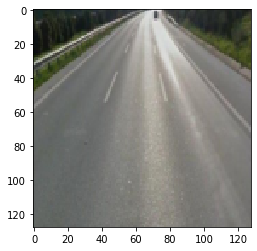

In [9]:
#test images
class_number = 2
i=0
for image in X_test:
    if(y_test[i,class_number-1] == 1):
        plt.figure()
        plt.imshow(image)
    i += 1

    

In [10]:
#normalize
X_train = X_train/255
X_test = X_test/255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [12]:
image_shape = X_train[0].shape
image_shape

(128, 128, 3)

In [29]:
#with tf.device('/GPU:0'):
#gpu_options = tf.GPUOptions(allow_growth=True)
#session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

model = Sequential()

#model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu', strides=(2,2)))
#zmiana na mniejszy bo obraz mniejszy i informacja na nim nie jest aż tak globalna

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape,  activation='relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())

model.add(Dense(384, activation='relu'))

#Final layer
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 122, 122, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 38, 38, 64)        18496     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 36, 36, 64)        36928     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 34, 34, 64)       

In [21]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [22]:
from tensorflow.keras.callbacks import EarlyStopping   

In [23]:
early_stop = EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)

In [31]:
with tf.device('/GPU:0'):
    results = model.fit(X_train,y_train,
                        epochs=50,
                        validation_data=(X_test,y_test),
                        callbacks=[early_stop])

Train on 512 samples, validate on 128 samples
Epoch 1/50
512/512 [==============================] - 4s 7ms/sample - loss: 1.6102 - accuracy: 0.2266 - val_loss: 1.6077 - val_accuracy: 0.2344
Epoch 2/50
512/512 [==============================] - 2s 3ms/sample - loss: 1.6084 - accuracy: 0.2344 - val_loss: 1.6059 - val_accuracy: 0.2344
Epoch 3/50
512/512 [==============================] - 2s 3ms/sample - loss: 1.6078 - accuracy: 0.2344 - val_loss: 1.6063 - val_accuracy: 0.2344
Epoch 4/50
512/512 [==============================] - 2s 3ms/sample - loss: 1.6070 - accuracy: 0.2344 - val_loss: 1.6059 - val_accuracy: 0.2344
Epoch 5/50
512/512 [==============================] - 2s 3ms/sample - loss: 1.6073 - accuracy: 0.2344 - val_loss: 1.6061 - val_accuracy: 0.2344
Epoch 6/50
512/512 [==============================] - 2s 3ms/sample - loss: 1.6064 - accuracy: 0.2344 - val_loss: 1.6059 - val_accuracy: 0.2344
Epoch 7/50
512/512 [==============================] - 2s 3ms/sample - loss: 1.6067 - accur

In [41]:
from tensorflow.keras.models import load_model

In [42]:
losses = pd.DataFrame(model.history.history)

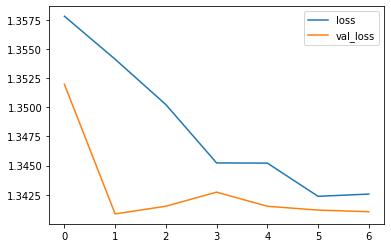

In [43]:
losses[['loss','val_loss']].plot()

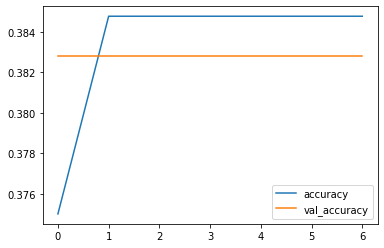

In [44]:
losses[['accuracy','val_accuracy']].plot()

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
predictions = model.predict_classes(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
y_test_classes = np.argmax(y_test_new, axis=1)
y_test_classes

array([1, 0, 0, 0, 3, 1, 1, 3, 2, 0, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 0,
       3, 0, 3, 0, 1, 2, 0, 0, 0, 0, 3, 0, 1, 3, 2, 0, 2, 0, 0, 1, 2, 0,
       1, 3, 0, 0, 1, 0, 3, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 3, 0, 2, 0,
       0, 2, 3, 3, 0, 0, 2, 0, 0, 0, 1, 3, 0, 2, 3, 3, 1, 1, 3, 0, 3, 1,
       3, 2, 3, 0, 1, 2, 0, 2, 3, 1, 2, 0, 3, 1, 1, 3, 0, 0, 3, 0, 1, 0,
       0, 0, 3, 3, 2, 3, 2, 2, 2, 3, 0, 1, 1, 3, 0, 2, 1, 3], dtype=int64)

In [52]:
print(classification_report(y_test_classes,predictions, labels = [1,2,3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00        79
   macro avg       0.00      0.00      0.00        79
weighted avg       0.00      0.00      0.00        79



C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
confusion_matrix(y_test_classes,predictions)

array([[49,  0,  0,  0],
       [24,  0,  0,  0],
       [25,  0,  0,  0],
       [30,  0,  0,  0]], dtype=int64)

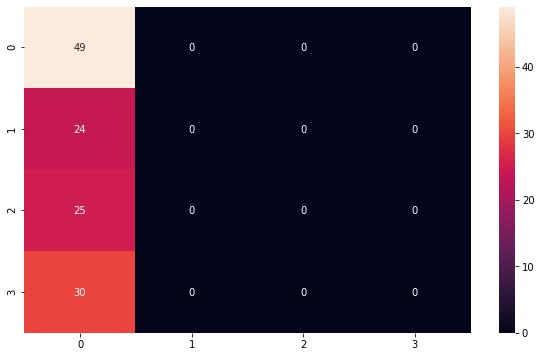

In [55]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test_classes,predictions),annot=True)